Instruction to use the code
- call the function VLM(AR,TR,SW_deg,b,M,N,wing_type) to calculate and visualize coordinate with appropriete attributes to the function
- - AR - Aspect Ratio
- - TR - Tapper Ratio
- - SW_deg - sweep angle at quarter chord in degrees
- - b - span of the wing
- - M - number of lattice one side of wing along span is divided in i.e Y-length of lattice will be b/(2M)
- - N -  number of lattice along chord
- - wing_type - for Delta wings wing_type = 'Delta' otherwise type anything

Coordinate system used is as follow:
- Origin - leading edge of root chord
- Positive x direction - along starboard side
- Positive y direction - from LE to TE
- root chord is along y-axis

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, tan, atan, atan2, pi, sqrt

In [ ]:
'''
coordinate function is defined to calculate end points of all the bound vortices
that are located at quarter chord distance from LE of each lattice and control
points that are located at three quarter chord distance from LE of that lattice
as per VLM for planar wings
'''

def VLM(AR_,TR_,SW_deg_,b_,M_,N_,wing_type_):

    # Local variables are created for each inputs for ease of writing
    AR = AR_ #Aspect Ratio
    TR = TR_ #Tapper Ratio
    SW = SW_deg_*pi/180 #Sweep at quarter chord line in radians
    #value assignment for span if no input is given
    if b_ == None:
       b = 2
    else:
       b = b_

    Cr = 2*b/(AR*(1+TR)) # calculation of root chord
    Ct = Cr*TR # calculation of Tip Chord

    if wing_type_ != 'Delta' and TR==1:
       SW_0 = SW
    elif wing_type_ != 'Delta'and TR!=1:

       SW_0 = atan(tan(SW) + (Cr-Ct)/2/b) # calculation of sweep angle at leading edge of the wing
    else:
       SW_0 =atan((Cr-Ct)*2/b)
       SW =atan(tan(SW_0)+(Ct-Cr)/2/b)



    M = M_ # Number of lattice along span on one side of the wing
    N = N_ # Number of lattice along Chord





    i_M = np.linspace(-M,M,2*M+1) # array containing whole wing's spanwise lattice number in symmetrical way e.g. [-2,-1,0,1,2], this will help calculate Y-coordinate of points
    B = b/2 + np.zeros((N,2*M)) # array containing constant value of b/2 that will help calculate Y-coordinates
    y_l = np.zeros((N,2*M)) # Zero array that will contain Y-coordinate of port side end of bound vortex of each lattice
    y_r = np.zeros((N,2*M))  # Zero array that will contain Y-coordinate of starboard side end of bound vortex of each lattice
    y_cp = np.zeros((N,2*M))  # Zero array that will contain Y-coordinate of control point of each lattice
    x_l = np.zeros((N,2*M))  # Zero array that will contain X-coordinate of port side end of bound vortex of each lattice
    x_r = np.zeros((N,2*M))  # Zero array that will contain X-coordinate of starboard side end of bound vortex of each lattice
    x_cp = np.zeros((N,2*M))    # Zero array that will contain X-coordinate of control point of each lattice
    x_b = np.zeros((N+1,2*M+1))   # Zero array that will contain X-coordinate of each corner point of lattice

    y_l = i_M[:-1]*B/M #calculation of Y-coordinate of port side of each bound vortex
    y_r = i_M[1:]*B/M #calculation of Y-coordinate of starboard side of each bound vortex
    y = i_M/M*(b/2+np.zeros((N,2*M+1)))
    x = np.zeros((N,2*M+1))
    y_cp = (y_l+y_r)/2 #calculation of Y-coordinate of control points
    y_b = i_M*(b/2 + np.zeros((N+1,2*M+1)))/M #calculation of Y-coordinate of boundary points of each lattice


    '''
    As the number of lattices is known a for loop is used to calculate
    X-coordinate of end points of bound vortices and control points using
    following formula
    X(i,j) = x(i,j)*tan(SW_0) + (0.25 + i)*(C(i,j))
    where x is x-coordinate of (i,J) point and SW_0 is sweep angle of LE and
    C is chord at (i,j) point

    In the next for loop y-coordinate of corner points of each lattice is calculated
    '''
    for i in range(N):
        for j in range(-M,M):
            x_l_ = np.absolute(y_l[i][j+M])*tan(SW_0) + (0.25 + i)*(Cr + (Ct-Cr)/M*np.absolute(j))/N
            x_r_ = np.absolute(y_r[i][j+M])*tan(SW_0) + (0.25 + i)*(Cr + (Ct-Cr)/M*np.absolute(j+1))/N
            x_l[i][j+M] = x_l_
            x_r[i][j+M] = x_r_
            x[i][j+M] = x_l_
            x[i][j+M+1] = x_r_
            x_cp[i][j+M] = np.absolute(y_cp[i][j+M])*tan(SW_0) + (0.75 + i)*(Cr + (Ct-Cr)/M*np.absolute(j+0.5))/N


    for i in range(N+1):
        for k in range(-M,M+1):
            x_b[i][k+M] = np.absolute(y_b[i][k+M])*tan(SW_0) + i*(Cr + (Ct-Cr)/M*np.absolute(k))/N


    '''
    Below is a function is defines which will calculate w(i,j,i_,j_)/Gamma(i_,j_) where
    w is perturbatuion velocity at (i,j) lattice control point because of
    (i_,j_) lattice's bound and trailling vortices. This function will be used in
    calculating coefficients of each gamma in final equations
    '''

    def w_by_gamma(i,j,i_,j_):
        w_b_by_gamma = (1/(4*pi))*(1/((x_cp[i][j]-x_l[i_][j_])*(y_cp[i][j]-y_r[i_][j_])-(x_cp[i][j]-x_r[i_][j_])*(y_cp[i][j]-y_l[i_][j_])))*(((x_r[i_][j_]-x_l[i_][j_])*(x_cp[i][j]-x_l[i_][j_])+(y_r[i_][j_]-y_l[i_][j_])*(y_cp[i][j]-y_l[i_][j_]))/(np.sqrt((x_cp[i][j]-x_l[i_][j_])**2 + (y_cp[i][j]-y_l[i_][j_])**2))-((x_r[i_][j_]-x_l[i_][j_])*(x_cp[i][j]-x_r[i_][j_])+(y_r[i_][j_]-y_l[i_][j_])*(y_cp[i][j]-y_r[i_][j_]))/(np.sqrt((x_cp[i][j]-x_r[i_][j_])**2 + (y_cp[i][j]-y_r[i_][j_])**2)))
        w_l_by_gamma = (1/(4*pi))*(1/(y_l[i_][j_]-y_cp[i][j]))*(1+(x_cp[i][j]-x_l[i_][j_])/np.sqrt((x_cp[i][j]-x_l[i_][j_])**2+(y_cp[i][j]-y_l[i_][j_])**2))
        w_r_by_gamma = -(1/(4*pi))*(1/(y_r[i_][j_]-y_cp[i][j]))*(1+(x_cp[i][j]-x_r[i_][j_])/np.sqrt((x_cp[i][j]-x_r[i_][j_])**2+(y_cp[i][j]-y_r[i_][j_])**2))
        w_by_gamma_ = w_b_by_gamma + w_l_by_gamma + w_r_by_gamma

        return w_by_gamma_

    C = np.zeros((2*M*N,2*M*N))
    G_by_U_infi_alpha = np.zeros(2*M*N)
    # Sequence for point followed from left to right (0,0),(0,1),...,(0,2*M),(1,0),(1,1),...,(1,2*M),...,(N,0),(N,1),...,(N,2M-1),(N,2M)
    # Sequence for point followed from LE to TE (0,0),(0,1),...,(0,2*M),(1,0),(1,1),...,(1,2*M),...,(N,0),(N,1),...,(N,2M-1),(N,2M)

    for i in range(2*M*N):
        for j in range(2*M*N):
            a = int(i/(2*M))
            b = i%(2*M)
            c = int(j/(2*M))
            d = j%(2*M)
            C[i][j] = w_by_gamma(a,b,c,d)

    C_inv = np.linalg.inv(C)

    Cl_alpha = 2 * np.sum(C_inv)/(-M)/(Cr+Ct)


    #print('The Lift curve slope(per rad) for given wing is ',Cl_alpha)
    #print('The Lift curve slope(per degree) for given wing is ',Cl_alpha*pi/180)
    #print(C*4*pi)
    #print(G_by_U_infi_alpha/(4*pi))

    #print(x_cp)
    #print(y_cp)
    #print(x_l)
    #print(y_l)
    #print(x_r)
    #print(y_r)
    #VLM = {"x_l":x_l,"y_l":y_l,"x_r":x_r,"y_r":y_r,"x_cp":x_cp,"y_cp":y_cp,"x_b":x_b,"y_b":y_b,"C":C,"C_inv":C_inv,"Cl_alpha":Cl_alpha,"M":M,"N":N,"Cr":Cr,"Ct":Ct,"SW_LE":SW_0,"SW":SW}
    VLM = {"x":x, "y":y, "x_l":x_l, "y_l":y_l, "x_r":x_r, "y_r":y_r, "x_cp":x_cp, "y_cp":y_cp, "x_b":x_b, "y_b":y_b, "C":C, "C_inv":C_inv, "Cl_alpha":Cl_alpha, "M":M, "N":N, "Cr":Cr, "Ct":Ct, "SW_LE":SW_0, "SW":SW}
    return VLM
    #return x_l,y_l,x_r,y_r,x_cp,y_cp,x_b,y_b,C,C_inv,Cl_alpha,M,N


def wingplot(A):
    x_l = A['x_l']
    y_l = A['y_l']
    x_r = A['x_r']
    y_r = A['y_r']
    x_cp = A['x_cp']
    y_cp = A['y_cp']
    x_b = A['x_b']
    y_b = A['y_b']
    M = A['M']
    N = A['N']

    # Plotting of wing, bound vortex and control points for better visualization
    for i in range(N+1):
        plt.plot(y_b[i],-x_b[i],color='black')
        if i < N:
           plt.plot(y_l[i],-x_l[i],color='orange')
           plt.plot(y_r[i],-x_r[i],color='orange')
    plt.plot(y_b,-x_b,color='black')
    plt.plot(y_cp,-x_cp,'x',color='red')
    plt.show()

def Cl_plot(A,B=0):
    K = np.linspace(B,12,20)
    G = np.linspace(0,(12-B)*A*pi/180,20)
    plt.plot(K,G)
    plt.xlabel("α")
    plt.ylabel("Cl")

def comparison(B):

    for x in B:
        Cl_plot(x)

    plt.show()

def report(A):
    print("PLOTTING OF WING FOR VISUALIZATION OF GEOMETRY")
    decor2()
    wingplot(A)
    decor()
    print("VALUES X COORDINATES OF END POINTS OF BOUND VORTICES")
    decor2()
    print(A['x'])
    decor()
    print("VALUES Y COORDINATES OF END POINTS OF BOUND VORTICES")
    decor2()
    print(A['y'])
    decor()
    print("VALUES X COORDINATES OF CONTROL POINTS")
    decor2()
    print(A['x_cp'])
    decor()
    print("VALUES Y COORDINATES OF CONTROL POINTS")
    decor2()
    print(A['y_cp'])
    decor()
    print("VALUE OF INFLUENCE COEFICCIENTS")
    decor2()
    #print(A['C'])
    decor()
    print("VALUE OF GAMMA PER UNIT ANGLE OF ATTACK PER UNIT FREE STREAM VELOCITY")
    decor2()
    #print(A["C_inv"])
    decor()
    print("VALUE OF LIFT CURVE SLOPE")
    decor2()
    print(A['Cl_alpha'])
    decor()



def decor():
    print(" ")
    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")
    print(" ")
def decor2():
    print("-----------------------------------------------------------------------------------------------------------------------------")

#VLM(AR_,TR_,SW_c_by_4_,b_,M_,N_) will return an array A = [x_l,y_l,x_r,y_r,x_cp,y_cp,x_b,y_b,C,C_inv,Cl_alpha,M,N,SW_LE,SW_C/4]





-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
EXAMPLE 7.4
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PLOTTING OF WING FOR VISUALIZATION OF GEOMETRY
-----------------------------------------------------------------------------------------------------------------------------


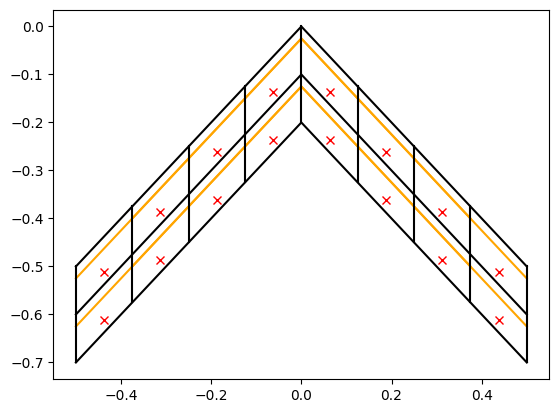

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALUES X COORDINATES OF END POINTS OF BOUND VORTICES
-----------------------------------------------------------------------------------------------------------------------------
[[0.525 0.4   0.275 0.15  0.025 0.15  0.275 0.4   0.525]
 [0.625 0.5   0.375 0.25  0.125 0.25  0.375 0.5   0.625]]
 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALUES Y COORDINATES OF END POINTS OF BOUND VORTICES
-----------------------------------------------------------------------------------------------------------------------------
[[-0.5   -0.375 -0.25  -0.125  0.     0.125  0.25   0.375  0.5  ]
 [-0.5   -0.375 -0.25  -0.125  0.     0.125  0.25   0.375  0.5  ]]
 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALU

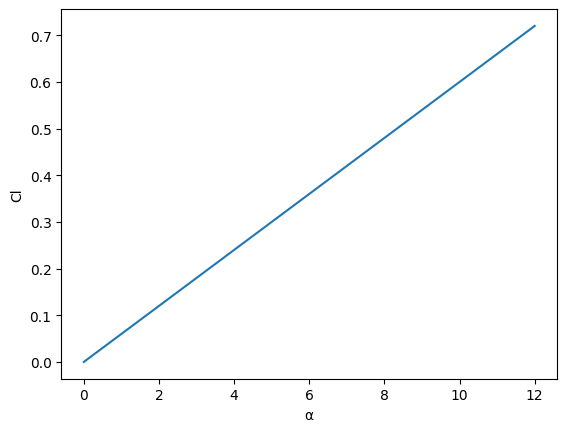

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 


In [ ]:
#Solving of Example 7.4
decor2()
decor2()
print("EXAMPLE 7.4")
decor2()
decor2()
Example_7_4 = VLM(5,1,45,1,4,2,'Normal')
report(Example_7_4)
print("PLOT OF CL VS ALPHA")
decor2()
Cl_plot(Example_7_4['Cl_alpha'])
plt.show()
decor()

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PROBLEM 7.9
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PLOTTING OF WING FOR VISUALIZATION OF GEOMETRY
-----------------------------------------------------------------------------------------------------------------------------


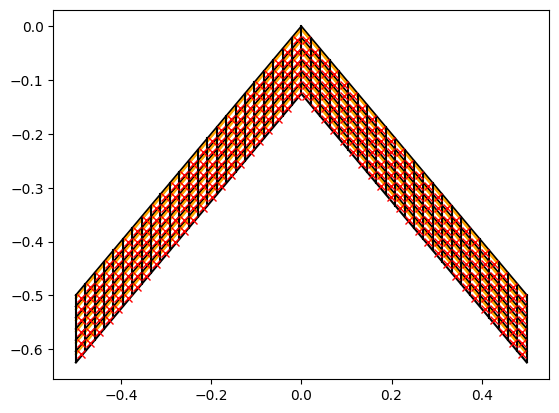

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALUES X COORDINATES OF END POINTS OF BOUND VORTICES
-----------------------------------------------------------------------------------------------------------------------------
[[0.50520833 0.484375   0.46354167 0.44270833 0.421875   0.40104167
  0.38020833 0.359375   0.33854167 0.31770833 0.296875   0.27604167
  0.25520833 0.234375   0.21354167 0.19270833 0.171875   0.15104167
  0.13020833 0.109375   0.08854167 0.06770833 0.046875   0.02604167
  0.00520833 0.02604167 0.046875   0.06770833 0.08854167 0.109375
  0.13020833 0.15104167 0.171875   0.19270833 0.21354167 0.234375
  0.25520833 0.27604167 0.296875   0.31770833 0.33854167 0.359375
  0.38020833 0.40104167 0.421875   0.44270833 0.46354167 0.484375
  0.50520833]
 [0.52604167 0.50520833 0.484375   0.46354167 0.44270833 0.421875
  0.40104167 0.38020833 0.359375   0.33854167 0.31770833 0.296875
  0.27604

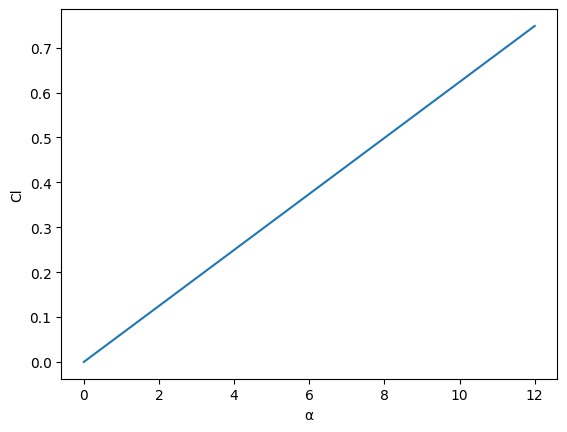

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
COMPARISON BETWEEN EXAMPLE 7.4 and PROBLEM 7.9
-----------------------------------------------------------------------------------------------------------------------------


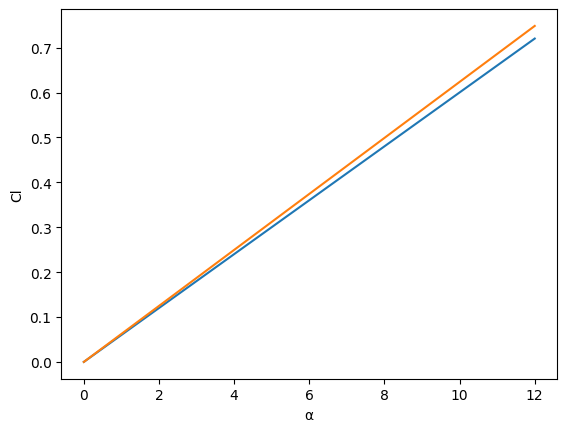

In [ ]:
#Solving of Problem 7.9
decor2()
decor2()
print("PROBLEM 7.9")
decor2()
decor2()
Problem_7_9 = VLM(8,1,45,1,24,6,'Normal')
report(Problem_7_9)
print("PLOT OF CL VS ALPHA")
decor2()
Cl_plot(Problem_7_9['Cl_alpha'])
plt.show()
decor()
print("COMPARISON BETWEEN EXAMPLE 7.4 and PROBLEM 7.9")
decor2()
AR_COMPARE = [Example_7_4['Cl_alpha'],Problem_7_9['Cl_alpha']]
comparison(AR_COMPARE)

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PROBLEM 7.10
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PLOTTING OF WING FOR VISUALIZATION OF GEOMETRY
-----------------------------------------------------------------------------------------------------------------------------


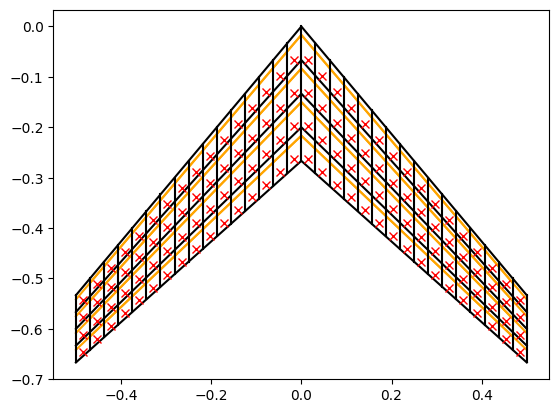

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALUES X COORDINATES OF END POINTS OF BOUND VORTICES
-----------------------------------------------------------------------------------------------------------------------------
[[0.54166667 0.50885417 0.47604167 0.44322917 0.41041667 0.37760417
  0.34479167 0.31197917 0.27916667 0.24635417 0.21354167 0.18072917
  0.14791667 0.11510417 0.08229167 0.04947917 0.01666667 0.04947917
  0.08229167 0.11510417 0.14791667 0.18072917 0.21354167 0.24635417
  0.27916667 0.31197917 0.34479167 0.37760417 0.41041667 0.44322917
  0.47604167 0.50885417 0.54166667]
 [0.575      0.54427083 0.51354167 0.4828125  0.45208333 0.42135417
  0.390625   0.35989583 0.32916667 0.2984375  0.26770833 0.23697917
  0.20625    0.17552083 0.14479167 0.1140625  0.08333333 0.1140625
  0.14479167 0.17552083 0.20625    0.23697917 0.26770833 0.2984375
  0.32916667 0.35989583 0.390625   0.42135417

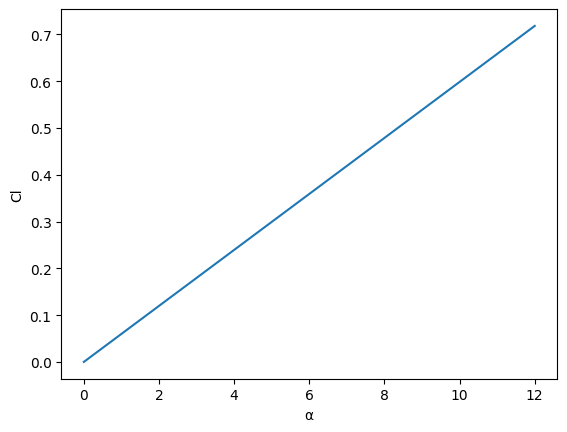

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
COMPARISON BETWEEN EXAMPLE 7.4 and PROBLEM 7.10
-----------------------------------------------------------------------------------------------------------------------------


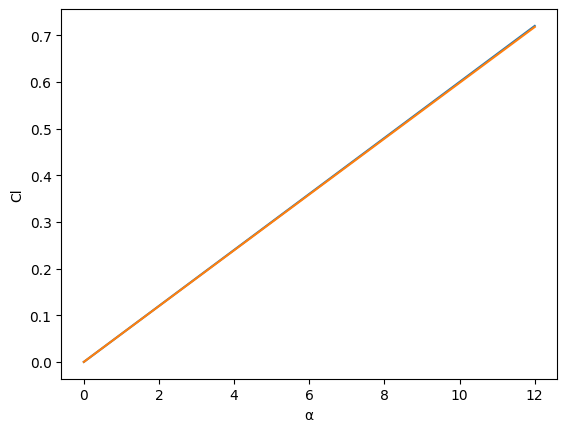

In [ ]:
#Solving of Problem 7.10
decor2()
decor2()
print("PROBLEM 7.10")
decor2()
decor2()
Problem_7_10 = VLM(5,0.5,45,1,16,4,'Normal')
report(Problem_7_10)
decor()
print("PLOT OF CL VS ALPHA")
decor2()
Cl_plot(Problem_7_10['Cl_alpha'])
plt.show()
decor()
print("COMPARISON BETWEEN EXAMPLE 7.4 and PROBLEM 7.10")
decor2()
AR_COMPARE = [Example_7_4['Cl_alpha'],Problem_7_10['Cl_alpha']]
comparison(AR_COMPARE)

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PROBLEM 7.11
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PLOTTING OF WING FOR VISUALIZATION OF GEOMETRY
-----------------------------------------------------------------------------------------------------------------------------


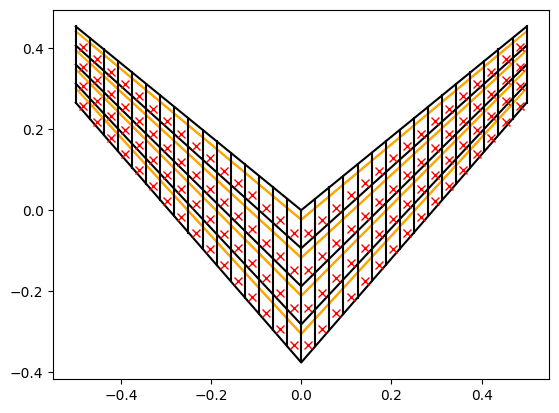

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALUES X COORDINATES OF END POINTS OF BOUND VORTICES
-----------------------------------------------------------------------------------------------------------------------------
[[-0.44131455 -0.41226526 -0.38321596 -0.35416667 -0.32511737 -0.29606808
  -0.26701878 -0.23796948 -0.20892019 -0.17987089 -0.1508216  -0.1217723
  -0.092723   -0.06367371 -0.03462441 -0.00557512  0.02347418 -0.00557512
  -0.03462441 -0.06367371 -0.092723   -0.1217723  -0.1508216  -0.17987089
  -0.20892019 -0.23796948 -0.26701878 -0.29606808 -0.32511737 -0.35416667
  -0.38321596 -0.41226526 -0.44131455]
 [-0.3943662  -0.36238263 -0.33039906 -0.29841549 -0.26643192 -0.23444836
  -0.20246479 -0.17048122 -0.13849765 -0.10651408 -0.07453052 -0.04254695
  -0.01056338  0.02142019  0.05340376  0.08538732  0.11737089  0.08538732
   0.05340376  0.02142019 -0.01056338 -0.04254695 -0.07453052

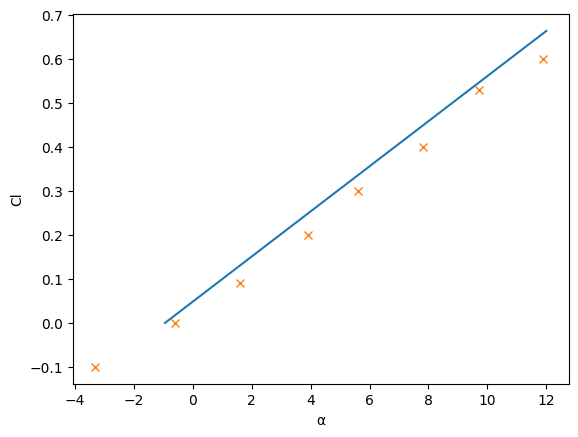

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
COMPARISON BETWEEN EXAMPLE 7.4 and PROBLEM 7.9
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Solving of Problem 7.11
decor2()
decor2()
print("PROBLEM 7.11")
decor2()
decor2()
Problem_7_11 = VLM(3.55,0.5,-45,1,16,4,'Normal')
report(Problem_7_11)
decor()
#Al = [0,2,4,6,8,10,12]
#Cl = [0,0.1,0.2,0.3,0.4,0.5,0.6]
Al = [-3.3,-0.6,1.6,3.9,5.6,7.8,9.7,11.9]
Cl = [-0.1,0,0.09,0.2,0.3,0.4,0.53,0.6]
Cl_plot(Problem_7_11['Cl_alpha'],-0.94)
plt.plot(Al,Cl,'x')
plt.show()
decor()
print("COMPARISON BETWEEN EXAMPLE 7.4 and PROBLEM 7.9")
decor2()

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PROBLEM 7.12
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
PLOTTING OF WING FOR VISUALIZATION OF GEOMETRY
-----------------------------------------------------------------------------------------------------------------------------


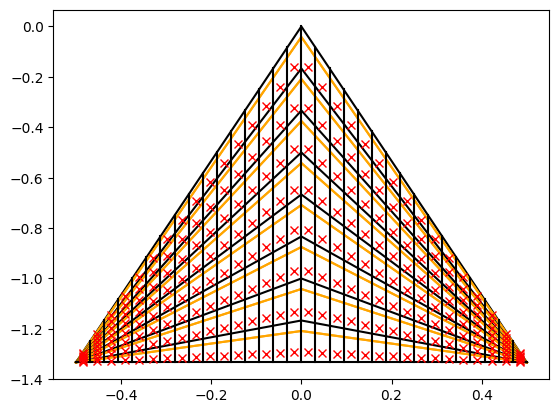

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 
VALUES X COORDINATES OF END POINTS OF BOUND VORTICES
-----------------------------------------------------------------------------------------------------------------------------
[[1.33333333 1.25260417 1.171875   1.09114583 1.01041667 0.9296875
  0.84895833 0.76822917 0.6875     0.60677083 0.52604167 0.4453125
  0.36458333 0.28385417 0.203125   0.12239583 0.04166667 0.12239583
  0.203125   0.28385417 0.36458333 0.4453125  0.52604167 0.60677083
  0.6875     0.76822917 0.84895833 0.9296875  1.01041667 1.09114583
  1.171875   1.25260417 1.33333333]
 [1.33333333 1.26302083 1.19270833 1.12239583 1.05208333 0.98177083
  0.91145833 0.84114583 0.77083333 0.70052083 0.63020833 0.55989583
  0.48958333 0.41927083 0.34895833 0.27864583 0.20833333 0.27864583
  0.34895833 0.41927083 0.48958333 0.55989583 0.63020833 0.70052083
  0.77083333 0.84114583 0.91145833 0.98177083

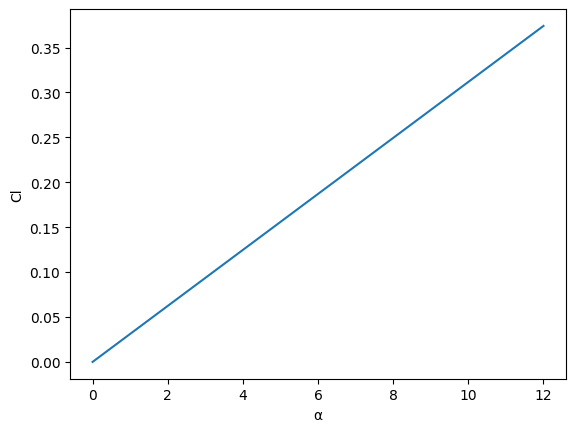

 
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 


In [ ]:
#Solving of Problem 7.12
decor2()
decor2()
print("PROBLEM 7.12")
decor2()
decor2()
Problem_7_12 = VLM(1.5,0,45,1,16,8,'Delta')
report(Problem_7_12)
decor()
print("PLOT OF CL VS ALPHA")
decor2()
Cl_plot(Problem_7_12['Cl_alpha'])
plt.show()
decor()

3.4442241877137145
1
3.3171206556002617
2
3.273031627235702
3
3.250831167854289
4
3.237508294030471
5
3.2286422995518906
6
3.2223246124680838
7
3.2175982773141807
8
Converged value of slope 3.2175982773141807
value of optimum M and N 36 9


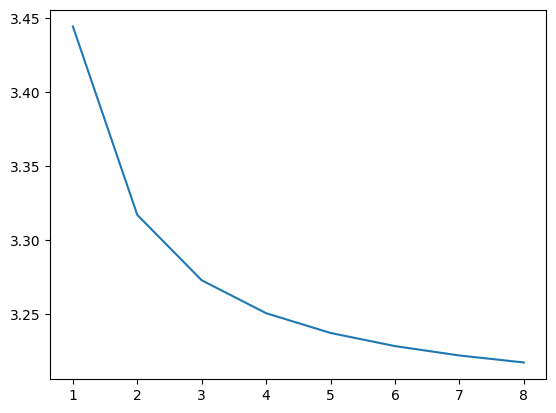

3.6861592768628064
1
3.6068966797775666
2
3.57952035466055
3
3.5657726761139874
4
3.5575397378310334
5
3.5520702903889454
6
3.5481784439744253
7
Converged value of slope 3.5481784439744253
value of optimum M and N 56 8


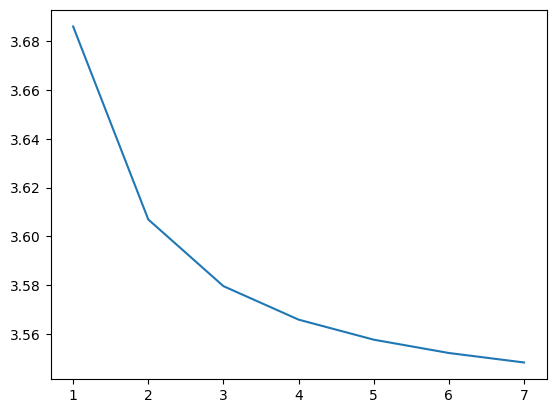

3.5768386836074177
1
3.480612578125767
2
3.4457559354632195
3
3.4279544338402665
4
3.4172055083012203
5
3.410030073527852
6
3.4049082424057358
7
3.401072742950886
8
Converged value of slope 3.401072742950886
value of optimum M and N 36 9


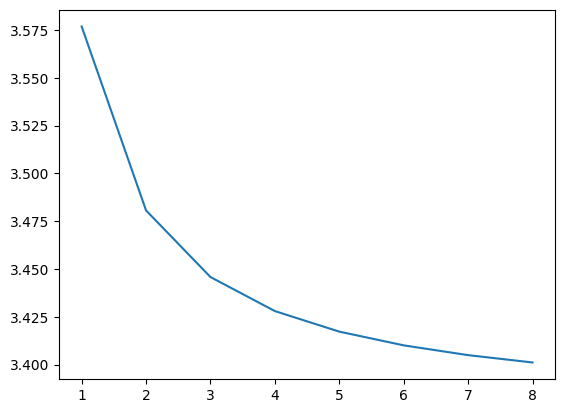

In [ ]:
#Test cases for convergence
def convergence(AR,TR,SW,b,m,n):
    Cl = []
    I = []
    e = 5
    i = 1
    while e>0.005:
        cl = VLM(AR,TR,SW,b,i*m,i*n,'Normal')
        c = cl['Cl_alpha']
        print(c)
        Cl.append(c)
        I.append(i)
        i += 1
        print(len(Cl))
        if len(Cl)>2:
           e = Cl[i-3]-Cl[i-2]

    print("Converged value of slope", Cl[-1])
    print("value of optimum M and N", i*m, i*n)
    plt.plot(I,Cl)
    plt.show()

convergence(5,1,45,1,4,1)
convergence(8,1,45,1,7,1)
convergence(5,0.5,45,1,4,1)



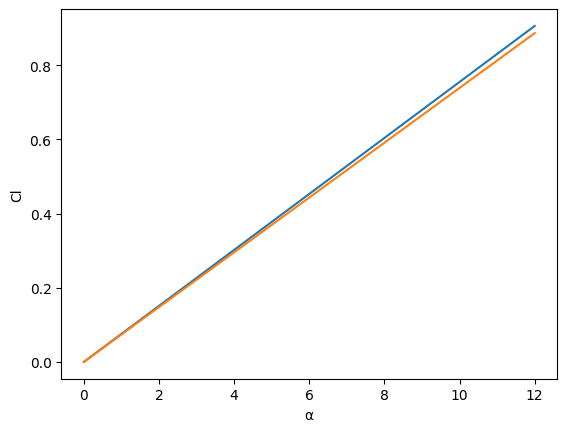

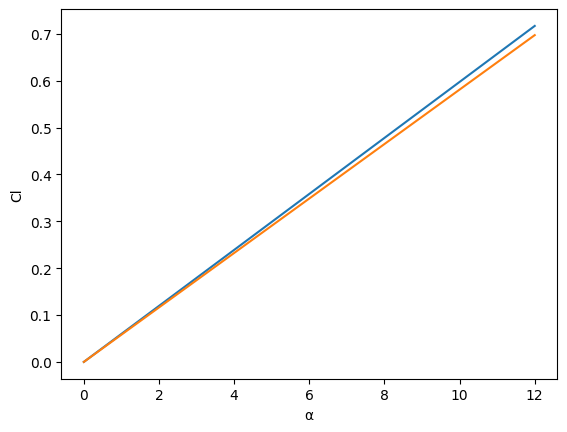

In [ ]:
#Comparison of Backward and Forward Sweep
BS1 = VLM(8,0.6,30,1,28,4,'Normal')
BS2 = VLM(8,0.6,50,1,28,4,'Normal')
FS1 = VLM(8,0.6,-30,1,28,4,'Normal')
FS2 = VLM(8,0.6,-50,1,28,4,'Normal')

S1 = [BS1['Cl_alpha'],FS1['Cl_alpha']]
S2 = [BS2['Cl_alpha'],FS2['Cl_alpha']]

comparison(S1)
comparison(S2)

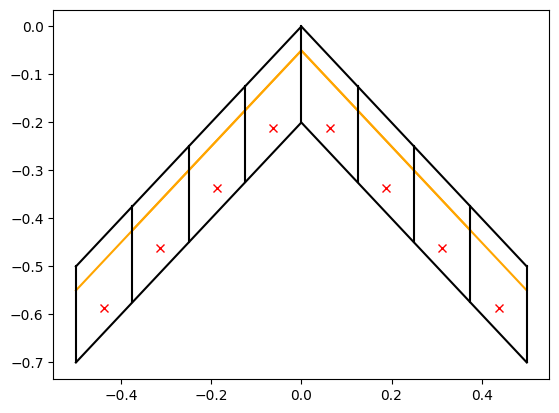

[[-5.69127575  1.60884981  0.30869537  0.12998437  0.06849956  0.03846703
   0.02304032  0.01460995]
 [ 0.89869015 -5.69127575  1.60884981  0.30869537  0.12318402  0.05751042
   0.03004727  0.01733605]
 [ 0.08559807  0.89869015 -5.69127575  1.60884981  0.28762098  0.09343889
   0.03901979  0.0199166 ]
 [ 0.0300424   0.08559807  0.89869015 -5.69127575  1.47337644  0.16316689
   0.04684674  0.02115487]
 [ 0.02115487  0.04684674  0.16316689  1.47337644 -5.69127575  0.89869015
   0.08559807  0.0300424 ]
 [ 0.0199166   0.03901979  0.09343889  0.28762098  1.60884981 -5.69127575
   0.89869015  0.08559807]
 [ 0.01733605  0.03004727  0.05751042  0.12318402  0.30869537  1.60884981
  -5.69127575  0.89869015]
 [ 0.01460995  0.02304032  0.03846703  0.06849956  0.12998437  0.30869537
   1.60884981 -5.69127575]]
[[0.55  0.425 0.3   0.175 0.05  0.175 0.3   0.425]]
[[0.5875 0.4625 0.3375 0.2125 0.2125 0.3375 0.4625 0.5875]]


In [ ]:
H = VLM(5,1,45,1,4,1,'Normal')
wingplot(H)
print(H['C'])
print(H['x_l'])
print(H['x_cp'])